# CSE474/574 - Programming Assignment 1

For grading, we will execute the submitted notebook as follows:

```shell
jupyter nbconvert --to python PA1Script.ipynb
python PA1Script.py
```

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle
import random

## Part 1 - Linear Regression

### Problem 1 - Linear Regression with Direct Minimization

In [2]:
print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [3]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                              
    # Output: 
    # w = d x 1
    inv = np.linalg.inv(np.dot(X.transpose(),X))
    term = np.dot(X.transpose(),y)
    w = np.dot(inv,term)
                              
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    #w = np.zeros((X.shape[0],1))
    return w

In [4]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value
    #y_predict = np.dot((w.transpose(),Xtest))

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    rmse = np.sqrt(((np.sum((ytest-np.dot(Xtest,w))**2))/Xtest.shape[0]))
    return rmse

In [5]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)

rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 138.20
RMSE with intercept on train data - 46.77
RMSE without intercept on test data - 326.76
RMSE with intercept on test data - 60.89


### Problem 2 - Linear Regression with Gradient Descent

In [6]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [7]:
def regressionObjVal(w, X, y):

    # compute squared error (scalar) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar value
    w = w.reshape(-1,1)

    t1 = y-np.matmul(X,w)
    
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    error = np.multiply((np.matmul(t1.T,t1)),0.5)
    
    return error[0][0]


In [8]:
def regressionGradient(w, X, y):

    # compute gradient of squared error (scalar) with respect
    # to w (vector) for the given data X and y   
    
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # gradient = d length vector (not a d x 1 matrix)

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE 
    
    w = w.reshape(-1,1)
    error_grad = np.dot(np.dot(X.transpose(),X),w).reshape(w.shape[0],)-np.dot(X.transpose(),y).reshape(w.shape[0],)
    
    #np.zeros((X.shape[1],))
    return error_grad

In [9]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
#w.reshape(-1,1)
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)

Gradient Descent Linear Regression RMSE on train data - 48.13
Gradient Descent Linear Regression RMSE on test data - 54.70


## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [10]:
print('PROBLEM 3')
print('----------')

PROBLEM 3
----------


In [11]:
def predictLinearModel(w,Xtest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # Output:
    # ypred =N x 1 vector of predictions

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    ypred = np.zeros([Xtest.shape[0],1])
#     ypred =np.sum(np.dot(Xtest,w))
    w = w.reshape(-1,1)
    y = np.matmul(Xtest,w)
    for i in range(0,y.shape[0]):
        if y[i]>0:
            ypred[i]=1
        else:
            ypred[i]=-1
    return ypred

In [12]:
def evaluateLinearModel(w,Xtest,ytest):
#     # Inputs:
#     # w = d x 1
#     # Xtest = N x d
#     # ytest = N x 1
#     # Output:
#     # acc = scalar values
    w = w.reshape(-1,1)
    ypred = predictLinearModel(w,Xtest)
    x = ypred * ytest
    count = 0
    for i in range(0,x.shape[0]):
        if x[i] == 1:
            count += 1

    acc = count*100/Xtest.shape[0]
    return acc

In [13]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

Perceptron Accuracy on train data - 84.00
Perceptron Accuracy on test data - 84.00


### Problem 4 - Logistic Regression Using Newton's Method

In [14]:
print('PROBLEM 4')
print('----------')

PROBLEM 4
----------


In [15]:
def logisticObjVal(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
#     if len(w.shape) == 1:
#         w = w[:,np.newaxis]
    
    return (np.sum(np.log(1 + np.exp(np.negative(np.dot(np.transpose(y),np.dot(X,w)))))))* (1/X.shape[0])

In [16]:
def logisticGradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)
    #sig = 1/1+np.exp(np.dot(X,-w))
#     print(w.shape)
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
#     print(w.shape)
#     w = w.reshape((X.shape[1],1))
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
#     gradient = np.zeros(w.shape[0],)
#     de = (1+np.exp(np.negative(np.dot(np.transpose(y), np.dot(X, w)))))
#     ne = y/de
#     #np.dot(y.T,X).reshape(w.shape[0],)
#     #print(ne.shape)
#     print(w)
#     #print(de.shape)
#     ae = np.dot(np.transpose(ne),X)
#     #print(ae.shape)
#     gradient = ae*(1/X.shape[0])
#     gradient = gradient.reshape(X.shape[1],)
    #print(gradient.shape)
#     return gradient
#     w = w.reshape((X.shape[1],1))
    return  np.negative(np.dot(np.transpose(y)/(1+np.exp((np.dot(np.transpose(y),np.dot(X, w)))).item()), X)/X.shape[0]).reshape((X.shape[1],))
#     return np.negative((np.dot(np.transpose(y), X)/(1 + np.exp(np.dot(np.transpose(y), np.dot(X, w))).item()))* (1/X.shape[0])).reshape(X.shape[1],)

In [17]:
def logisticHessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    #sig = 1/1+np.exp(np.dot(X,-w))
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    #w = w.reshape(-1,1)
    #a = np.exp(np.dot(y,np.dot(X,w).transpose()))
#     hessian = np.eye(X.shape[1])
    hessian = (1/X.shape[0])*(np.exp(np.dot(np.transpose(y), np.dot(X, w)))* np.dot(np.transpose(X), X))/(1 + np.exp(np.dot(np.transpose(y), np.dot(X, w))))**2
    #hessian = np.dot(np.dot(sig,1-sig),np.dot(X.T,X))/X.shape[0]
    #print(hessian)
    return hessian

In [18]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)

w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)
# soln

Logistic Regression Accuracy on train data - 85.00
Logistic Regression Accuracy on test data - 86.00


### Problem 5 - Support Vector Machines Using Gradient Descent

In [19]:
print('PROBLEM 5')
print('----------')

PROBLEM 5
----------


In [91]:
def trainSGDSVM(X,y,T,eta=0.01):
    # learn a linear SVM by implementing the SGD algorithm
    #
    # Inputs:
    # X = N x d
    # y = N x 1
    # T = number of iterations
    # eta = learning rate
    # Output:
    # weight vector, w = d x 1
    N = X.shape[0]
    pop= [0]
    for i in range(0,N):
        pop.append(i)
    # IMPLEMENT THIS METHOD
    w = np.zeros([X.shape[1],1])
    for t in range(0,T):
        i = random.sample(pop,1)
        l = y[i]*X[i]*w
        #print(l)
        if l[0][0] < 1:
            #print(eta*y[i]*X[i])
            w = w + (eta*y[i]*X[i]).reshape(w.shape[0],1)
    #print(w.shape)
    return w

In [93]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

SVM Accuracy on train data - 85.00
SVM Accuracy on test data - 88.00


### Problem 6 - Plotting decision boundaries

In [81]:
print('Problem 6')
print('---------')

Problem 6
---------


In [35]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

Text(0.5, 1.0, 'SVM')

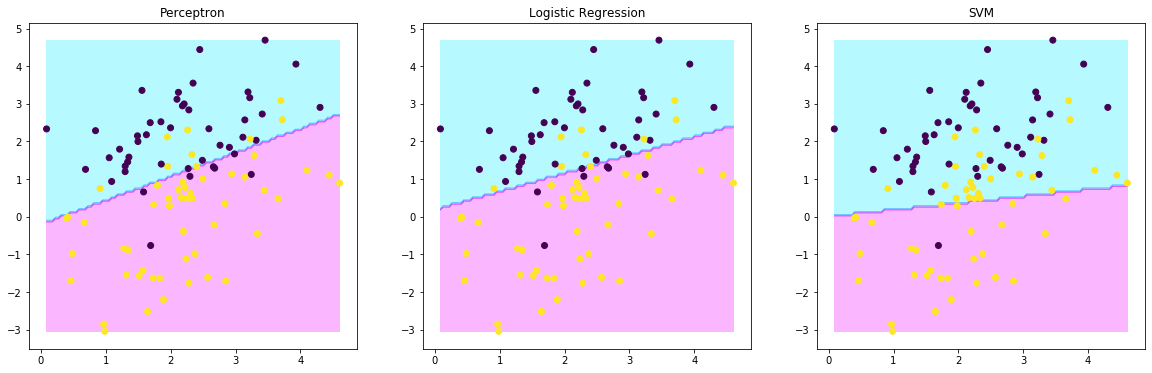

In [42]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
#opts = {'maxiter' : 5}  # Preferred value.  
opts = {'maxiter' : 50}
w_init = np.zeros((Xtrain_i.shape[1],1))

# Replace next three lines with code for learning w using the three methods/
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w_pre = np.transpose(np.array(soln.x))

logistic = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w_log = np.transpose(np.array(logistic.x))

w_perceptron = w_pre[:,np.newaxis]
#print(w_perceptron)
w_logistic = np.reshape(w_log,[len(w_log),1])
#print(w_logistic)
w_svm = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')
